## Custering - K-Means Algriothm

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Read the dataset
customers = pd.read_csv('../../Datasets/mall_customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Implementing K-Means Algorithm from scratch

In [93]:
cols_to_use = ['Age', 'Spending Score']
customers = customers[cols_to_use].copy()
centroid = customers.sample(2).reset_index(drop=True)

def get_centroids_coordinates(centroid):
    age_centroid1, score_centroid1, age_centroid2, score_centroid2 = centroid.iloc[0, 0], centroid.iloc[0, 1], centroid.iloc[1, 0], centroid.iloc[1, 1]
    return age_centroid1, score_centroid1, age_centroid2, score_centroid2


def calculate_distance(row, age_centroid, score_centroid):
    distance = np.sqrt((row['Age'] - age_centroid) ** 2 + (row['Spending Score'] - score_centroid) ** 2)
    return distance


def calculate_distance_assign_clusters(customers, centroid):
    age_centroid1, score_centroid1, age_centroid2, score_centroid2 = get_centroids_coordinates(centroid)
    customers['dist_centroid1'] = customers.apply(lambda row: calculate_distance(row, age_centroid1, score_centroid1), axis=1)
    customers['dist_centroid2'] = customers.apply(lambda row: calculate_distance(row, age_centroid2, score_centroid2), axis=1)
    customers['cluster'] = np.where(customers['dist_centroid1'] < customers['dist_centroid2'], 1, 2)

    return customers

def create_clusters(customers):
    centroid = customers.sample(2)
    customers = calculate_distance_assign_clusters(customers, centroid)
    new_centroid = customers.groupby('cluster')[['Age', 'Spending Score']].mean().reset_index()
    new_centroid.drop('cluster', axis=1, inplace=True)
    customers = calculate_distance_assign_clusters(customers, new_centroid)
    return customers['cluster']
    

In [94]:
customers = calculate_distance_assign_clusters(customers, centroid)

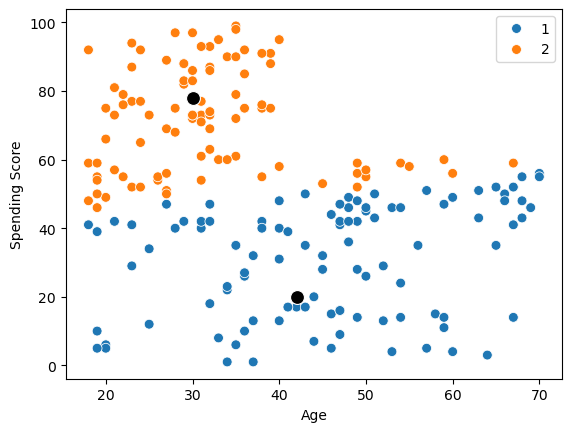

In [95]:
sns.scatterplot(customers, x='Age',y='Spending Score', hue='cluster', palette='tab10', s=50)
sns.scatterplot(centroid, x='Age', y='Spending Score', color='black', s=100)
plt.show()

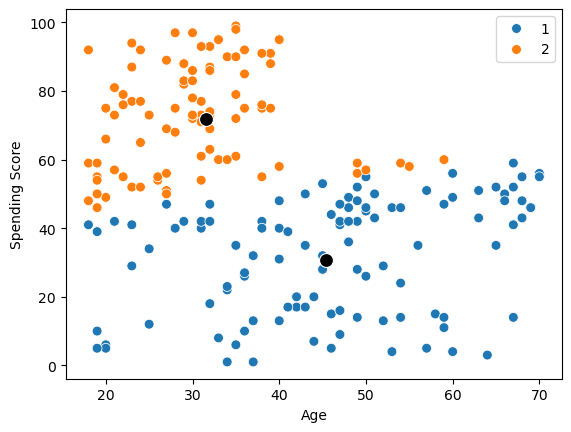

In [96]:
new_centroid = customers.groupby('cluster')[['Age', 'Spending Score']].mean().reset_index().drop('cluster', axis=1)
new_customers = calculate_distance_assign_clusters(customers, new_centroid)
sns.scatterplot(new_customers, x='Age',y='Spending Score', hue='cluster', palette='tab10', s=50)
sns.scatterplot(new_centroid, x='Age', y='Spending Score', color='black', s=100)
plt.show()

In [97]:
create_clusters(customers)

0      1
1      1
2      2
3      1
4      1
      ..
195    1
196    2
197    1
198    2
199    1
Name: cluster, Length: 200, dtype: int32